# Explore dataset

## Import and preprocess dataframes

In [1]:
import pandas as pd
import numpy as np
import spacy
import re
# from collections import Counter
from modules.CorpusUtilsGpt import parse_conversations_from_dataframe, convert_dataframe_to_convokit

In [ ]:
# terminal stuff
# !uv sync
# !source .venv/bin/activate
# !uv pip install pip
# !uv run -- spacy download en_core_web_sm

In [2]:
# data/alldyads.csv
# data/headers.csv
df = pd.read_csv('../data/alldyads.csv', header=0)
df = df.replace('', np.nan)

headers_df = pd.read_csv('../data/headers.csv')
headers_df = headers_df.T #transpose

numeric_cols = [
    'b_country',
    'b_RankBuy_1','b_RankBuy_2','b_RankBuy_3','b_RankBuy_4',
    's_country',
    's_RankSell_1','s_RankSell_2','s_RankSell_3','s_RankSell_4']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2891 entries, 0 to 2890
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   b_country       2510 non-null   float64
 1   b_RankBuy_1     2543 non-null   float64
 2   b_RankBuy_2     2543 non-null   float64
 3   b_RankBuy_3     2543 non-null   float64
 4   b_RankBuy_4     2543 non-null   float64
 5   b_Tact_1        2160 non-null   float64
 6   b_Tact_2        2160 non-null   float64
 7   b_Tact_3        2160 non-null   float64
 8   b_Tact_4        2143 non-null   float64
 9   b_Tact_5        2160 non-null   float64
 10  b_Tact_6        2160 non-null   float64
 11  b_Tact_7        2160 non-null   float64
 12  b_Tact_8        2160 non-null   float64
 13  b_Tact_9        2143 non-null   float64
 14  b_Tact_10       2160 non-null   float64
 15  b_PlayAI        405 non-null    float64
 16  b_AI-cues       400 non-null    object 
 17  b_AI4me         404 non-null    f

In [3]:
df['formattedChat']

0       nan Seller: Your sudden demand for a refund is...
1       1699388451 Buyer: Hi there! I believe I receiv...
2       nan Seller: Your sudden demand for a refund is...
3       nan Buyer: Your response is utterly unacceptab...
4       nan Buyer: Your response is utterly unacceptab...
                              ...                        
2886    nan Seller: Your sudden demand for a refund is...
2887    nan Seller: Your sudden demand for a refund is...
2888    nan Seller: Your sudden demand for a refund is...
2889    1718878682 Buyer: Hi there, thank you for send...
2890    nan Seller: Your sudden demand for a refund is...
Name: formattedChat, Length: 2891, dtype: object


#conversationID based on 1st utterance of df

### def toUtterance():
get all primary info from formatted dataframe column

- id
- speaker
- conversation_id
- reply_to
- timestamp
- text



#### Metadata:
{metadata} (per speaker)
metadata: country code column
### def toSpeakers():
- need to convert each row to have unique buyer/seller ID
- check if there are duplicate participants allowed
- isAI (if seller is AI)
#### Metadata:
- country code (b_country, s_country)
- self reports (later)


### def toConversations():
convo-id : {metadata}
#### Metadata:
- outcome of dipsute

  
### def toCorpus():
- save for later
  
### def toIndex():
- save for later

# CorpusConverter
- formattedChat

## Import spacy

In [ ]:
# !uv pip install pip
# !uv run -- spacy download en_core_web_sm

In [5]:
spacy.load('en_core_web_sm')

## Test corpus creation function (gpt)

In [11]:
# from convokit import PolitenessStrategies,
from convokit import TextCleaner, TextParser, Corpus, FightingWords

In [7]:
convert_dataframe_to_convokit(df, "my_buyer_seller_corpus")
buyerseller_corpus = Corpus(filename="/Users/adb/.convokit/saved-corpora/my_buyer_seller_corpus")
buyerseller_corpus.print_summary_stats()

Corpus saved to 'my_buyer_seller_corpus'.
Number of Speakers: 5764
Number of Utterances: 39804
Number of Conversations: 2882


In [9]:
#print 5 random utterances
for i in range(5):
    print(buyerseller_corpus.random_utterance().text)

I'm not trying to deceive you. It seems that a seller has had an issue with you in the past.
I could offer a 50% partial refund since all our sales are final and this is an exception. I would also really appreciate if you would leave a review on our page.
Thank u for understanding. I will promptly process your 50% refund and also withdraw my feedback about u as well. Let's keep things professional moving forward.
Accept Deal
Submitted agreement: Buyer gets full refund, buyer kept their review, seller kept their review, buyer did apologize, and seller didn't apologize.


In [10]:
# print 2 random conversations
for i in range(2):
    print(buyerseller_corpus.random_conversation())

Conversation('id': 'conv_349', 'utterances': ['utt_349_0', 'utt_349_1', 'utt_349_2', 'utt_349_3', 'utt_349_4', 'utt_349_5', 'utt_349_6', 'utt_349_7', 'utt_349_8', 'utt_349_9', 'utt_349_10', 'utt_349_11'], 'meta': ConvoKitMeta({}))
Conversation('id': 'conv_665', 'utterances': ['utt_665_0', 'utt_665_1', 'utt_665_2', 'utt_665_3', 'utt_665_4', 'utt_665_5', 'utt_665_6', 'utt_665_7', 'utt_665_8', 'utt_665_9', 'utt_665_10', 'utt_665_11', 'utt_665_12', 'utt_665_13', 'utt_665_14', 'utt_665_15', 'utt_665_16', 'utt_665_17', 'utt_665_18', 'utt_665_19', 'utt_665_20', 'utt_665_21', 'utt_665_22', 'utt_665_23', 'utt_665_24', 'utt_665_25', 'utt_665_26', 'utt_665_27', 'utt_665_28', 'utt_665_29', 'utt_665_30', 'utt_665_31'], 'meta': ConvoKitMeta({}))


## Find the fighting words between buyers and sellers in the buyer-seller chat data.


39804/39804 utterances processed
39804/39804 utterances processed
Initializing default CountVectorizer with ngram_range (1, 3)... Done.
class1_func returned 20407 valid corpus components. class2_func returned 19397 valid corpus components.
Vocab size is 15000
Comparing language...
ngram zscores computed.


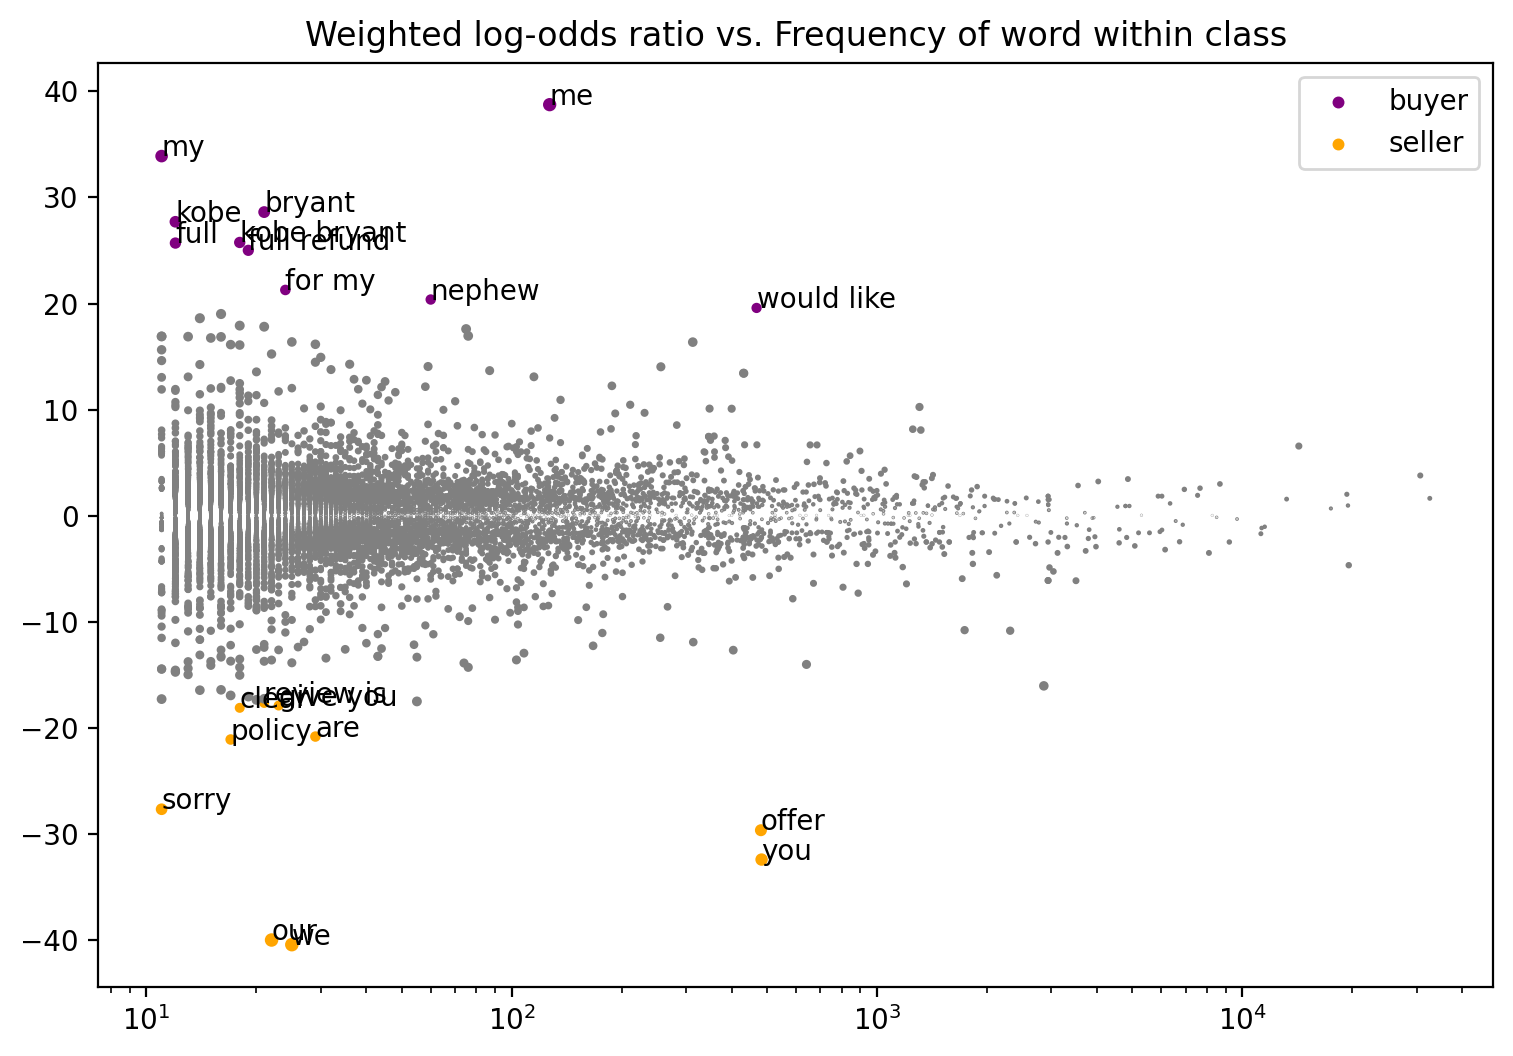

,z-score,class
ngram,,
we,-40.439790,seller
our,-40.002262,seller
you,-32.417338,seller
offer,-29.651747,seller
sorry,-27.675055,seller
...,...,...
kobe bryant,25.755894,buyer
kobe,27.705830,buyer
bryant,28.618968,buyer


In [12]:
TextCleaner(verbosity=50000).transform(buyerseller_corpus)
# TextParser(verbosity=50000).transform(buyerseller_corpus)

for utt in buyerseller_corpus.iter_utterances():
    if utt.speaker.id.startswith('Buyer'):
        utt.speaker.meta['role'] = 'buyer'
    elif utt.speaker.id.startswith('Seller'):
        utt.speaker.meta['role'] = 'seller'
    else:
        utt.speaker.meta['role'] = 'unknown'

fw = FightingWords()
fw.fit(buyerseller_corpus, class1_func=lambda utt: utt.speaker.meta['role'] == 'buyer',
       class2_func=lambda utt: utt.speaker.meta['role'] == 'seller')
fw.summarize(buyerseller_corpus, plot=True, class1_name='buyer', class2_name='seller')